### Name: Anantharam(Ananth) Subramanian
### NLP Homework 7

In [70]:
import tensorflow as tf
import tensorflow_hub as hub

### Imagine you are an Engineer for Amazon Alexa. You are given the task of understanding text input and classifying it. Create a data set of sayings that fall into 2 Categories: Getting Directions and Playing Music. Make sure you data set has at least 100 examples total.
### Example Playing Music: "Play some Pantera on Spotify"
### Example Directions: "Where is the nearest Starbucks"

### An imaginary file is created with 50 samples for playing music and 50 samples for getting directions

In [74]:
import pandas as pd
data = pd.read_csv('C:\\Users\\anant\\Documents\\NLP\\hw7\\hw7_classifier_data.csv')

In [75]:
import numpy as np
y = np.array(data['Label'])
x = np.array(data['Statement'])

In [71]:
x.shape

(100,)

### An example for getting directions

In [72]:
x[10]

"Where is Seinfield's stand-up comedy happening"

### An example for playing music 

In [76]:
x[12]

"Play Joe Cocker's You are so beautiful on Marvis"

### The dataset is shuffled for better split and further classification

In [77]:
from sklearn.utils import shuffle
x,y = shuffle(x, y, random_state=0)

### Q1 Given the following module that outputs a vector which represents your input sentence, transform your data into numbers.

### Using Universal Sentence Encoder the sentences ( in this case playing music and getting directions related sentences stored in variable x) are converted to number. Each sentence irrespective of its length is converted to a vector of shape 512.

In [81]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/3")
embeddings = embed(x)["outputs"]

embeddings = np.array(embeddings)
print('First sentence shape:',embeddings[0].shape)
print('Last sentence shape:',embeddings[99].shape)


First sentence shape: (512,)
Last sentence shape: (512,)


### The dataset is split as test and train using sklearn train_test_split model

In [138]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(embeddings, y, test_size=0.33, random_state=42)

### Q2: Take your numbers from Q1 and create 2 classifiers of any type. What is your best guess for the accuracy of your models. (Don't forget to use good data science practices!)

### RandomForest Classifier along with GridSearchCV is used for best parameter selection. A heat map is then drawn to show the accuracy scores for the parameters chosen.

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [140]:
rf = RandomForestClassifier()

### A dictionary is created for passing the parameters to gridsearch

In [141]:
parameters = {'n_estimators': [1,4],'criterion':['gini','entropy'], 'max_depth':[100,200],'min_samples_leaf':[1,4]}

In [142]:
clf = GridSearchCV(rf, parameters, cv=5, refit='accuracy')

In [131]:
gcv = clf.fit(X_train,y_train)

C:\Users\anant\Anaconda3\envs\getty_proj\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [143]:
print('Best parameters:',gcv.best_params_)
#print(gcv.cv_results_)
print('Accuracy Score:', gcv.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 200, 'min_samples_leaf': 4, 'n_estimators': 4}
Accuracy Score: 0.9552238805970149


In [134]:
n_estimators= [1, 2, 3, 4]
min_samples_leaf = [1, 2, 3, 4]


In [135]:
scores = gcv.cv_results_['mean_test_score'].reshape(len(n_estimators),len(min_samples_leaf))

In [136]:
scores

array([[0.86567164, 0.94029851, 0.7761194 , 0.92537313],
       [0.85074627, 0.89552239, 0.88059701, 0.95522388],
       [0.8358209 , 0.88059701, 0.86567164, 0.94029851],
       [0.88059701, 0.95522388, 0.82089552, 0.92537313]])

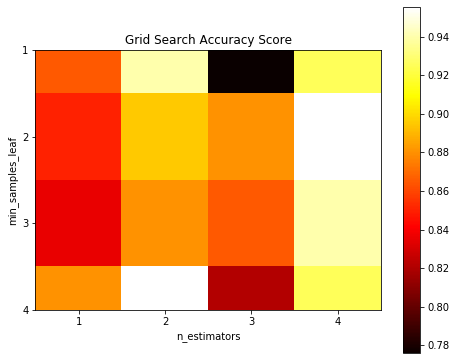

In [137]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('min_samples_leaf')
plt.colorbar()
plt.xticks(np.arange(len(n_estimators)), n_estimators)
plt.yticks(np.arange(len(min_samples_leaf)), min_samples_leaf)
plt.title('Grid Search Accuracy Score')
plt.show()

In [1]:
from keras.layers import Input, Lambda, Dense
from keras.models import Model
import keras.backend as K
import tensorflow as tf
import tensorflow_hub as hub
import keras.utils
#from tensorflow.keras.models import Model


Using TensorFlow backend.
c:\users\anant\anaconda3\envs\proj_getty\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\anant\anaconda3\envs\proj_getty\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\anant\anaconda3\envs\proj_getty\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\anant\anaconda3\envs\pr

In [2]:
embed = hub.Module("https://tfhub.dev/google/universal-sentence-encoder-large/3")
#embeddings = embed(data)["outputs"]

In [3]:
import pandas as pd
data = pd.read_csv('C:\\Users\\anant\\Documents\\NLP\\hw7\\hw7_classifier_data.csv')

In [4]:
import numpy as np
y = np.array(data['Label'])
x = np.array(data['Statement'])

In [5]:
from sklearn.utils import shuffle
x,y = shuffle(x, y, random_state=0)

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [7]:
def UniversalEmbedding(X_train):
    return embed(tf.squeeze(tf.cast(X_train, tf.string)))


In [8]:
input_text = Input(shape=(1,), dtype=tf.string)
print(input_text)
embedding = Lambda(UniversalEmbedding, output_shape=(512, ))(input_text)
#embeddings = embed(X_train)["outputs"]

dense = Dense(512, activation='relu')(embedding)
pred = Dense(1, activation='sigmoid')(dense)
model = Model(inputs=[input_text], output=pred)
model.compile(loss='binary_crossentropy', optimizer = 'adam',metrics=['accuracy'])

Tensor("input_1:0", shape=(?, 1), dtype=string)
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore



c:\users\anant\anaconda3\envs\proj_getty\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`
  


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
with tf.Session() as session:
    K.set_session(session)
    session.run(tf.global_variables_initializer())
    session.run(tf.tables_initializer())
    history = model.fit(X_train, y_train, epochs=3)
    X_pred = ['Play Backstreet boys on Spotify', 'Where is the nearest Burger King', 'Play Celine Everynight in my dream']
    X_pred1 = np.array(X_pred)
    y_hat = model.predict(X_pred1)
    print(y_hat)

Epoch 1/3
67/67 [==============================] - 4s 58ms/step - loss: 0.6652 - acc: 0.7463
Epoch 2/3
67/67 [==============================] - 0s 5ms/step - loss: 0.5247 - acc: 1.0000
Epoch 3/3
67/67 [==============================] - 0s 5ms/step - loss: 0.4068 - acc: 1.0000
[[0.28621945]
 [0.74977213]
 [0.3342648 ]]
